In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv('data/test.csv')

In [3]:
#处理分类对象为numeric类型
def trans_prognois(col):
    name_list = list(col.value_counts().index)
    target_list = []
    for each in col:
         target_list.append(name_list.index(each)) #返回指定值的索引
    return target_list

In [4]:
#定义X,y
X = train_data.iloc[:,:-1]
y = trans_prognois(train_data.prognosis)

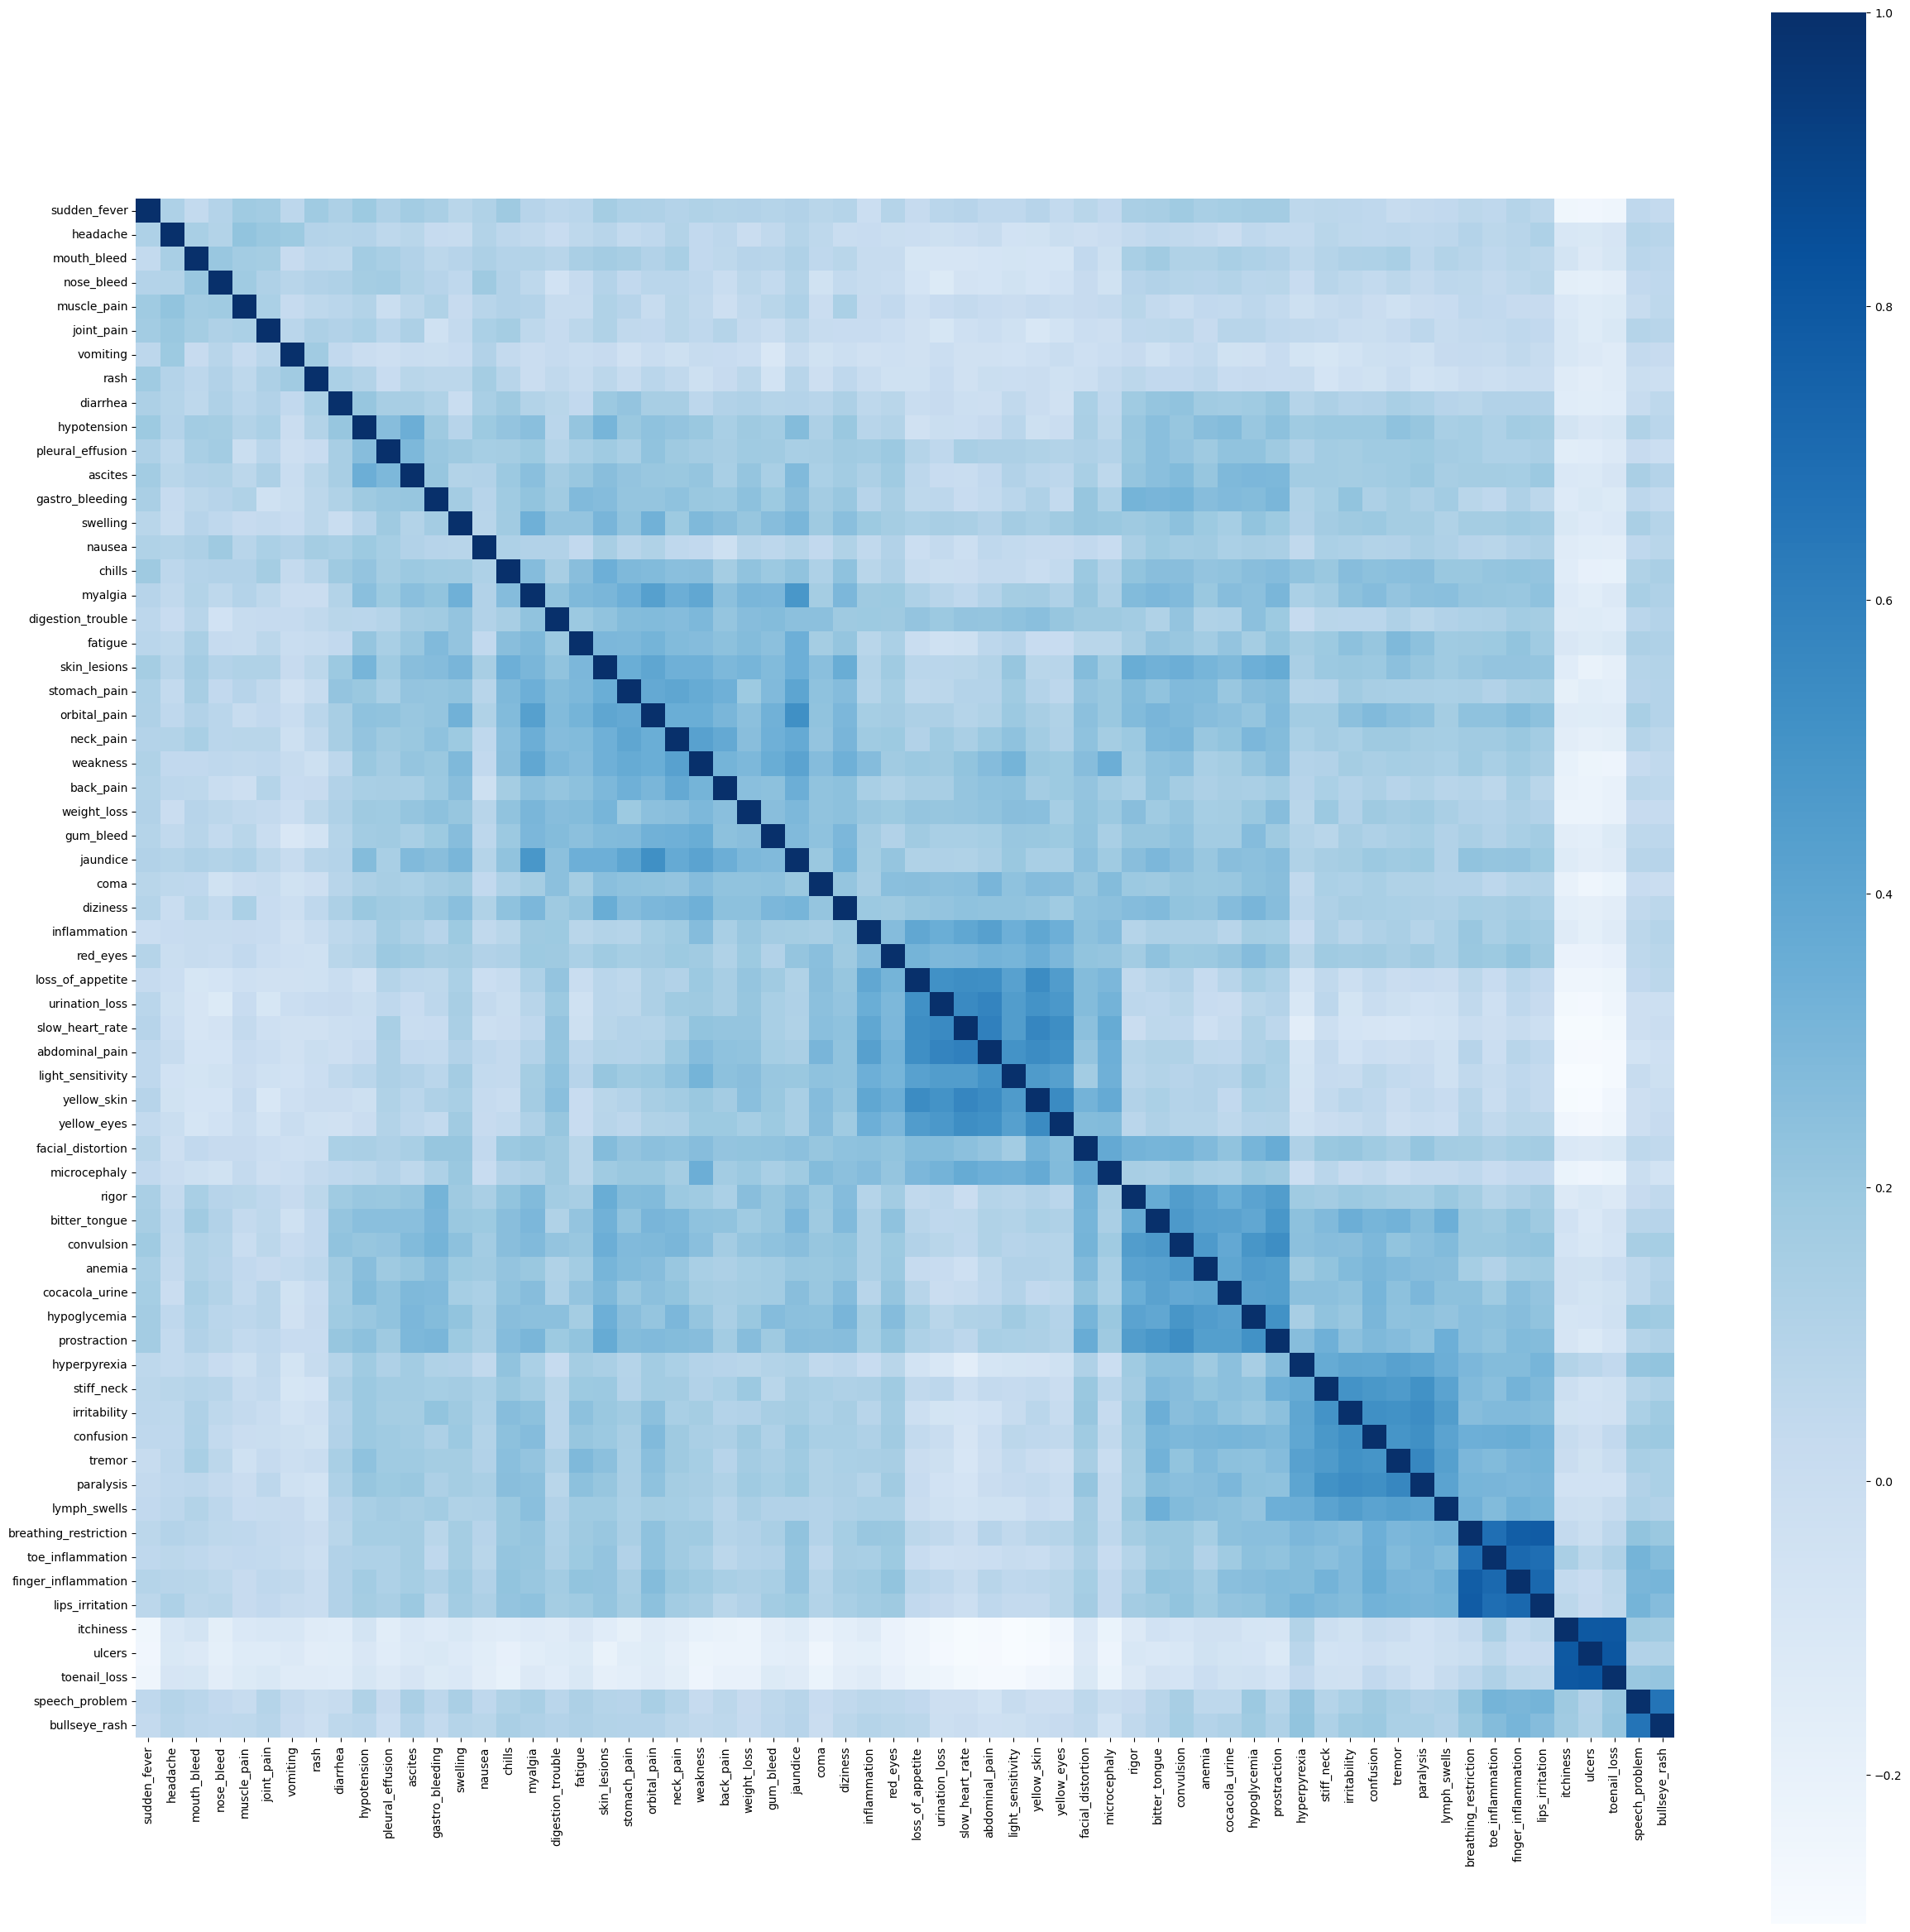

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(30, 30))
sns.heatmap(X.iloc[:,1:].corr(), annot=False, vmax=1, square=True, cmap="Blues")
plt.show()

In [6]:
X.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [7]:
def preprocess_data(df,sc=False):
    #df.drop(columns=['id'],inplace=True)
    df.drop(columns=['id','ulcers'],inplace=True)
    #df.drop(columns=['id','itchiness'],inplace=True)
    #df.drop(columns=['id','ulcers','lips_irritation'],inplace=True)
    #df.drop(columns=['id','ulcers','lips_irritation','finger_inflammation'],inplace=True)
    
    if sc == True:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        df.iloc[:,:] = sc.fit_transform(df.iloc[:,:])
    
    return df

In [8]:
X = train_data.iloc[:,:-1]
X_train = preprocess_data(X)

In [9]:
X.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,toenail_loss,speech_problem,bullseye_rash
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB

mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.svm import SVC
svc = SVC(probability=True)

from sklearn.ensemble import VotingClassifier
vc_1 = VotingClassifier([('mnb',mnb),('bnb',bnb),('svc',svc)])
vc_2 = VotingClassifier([('mnb',mnb),('bnb',bnb)],voting='soft')

In [11]:
#baseline for model vc_1
from sklearn.model_selection import cross_val_score
print(cross_val_score(vc_1, X_train, y).mean())

0.3197582659075017


In [12]:
#baseline for model vc_2
from sklearn.model_selection import cross_val_score
print(cross_val_score(vc_2, X_train, y).mean())

0.3282189591449406


In [13]:
#vc_1 调参
params = {'weights':[(1,1,1),(1,1,2),(1,2,1),(2,1,1)],
          'voting':['soft','hard'],
          #'force_alpha':[True, False],
          'bnb__alpha':[0,0.2],
          'bnb__fit_prior':[True, False],
          'mnb__fit_prior':[True, False],
          'mnb__alpha':[0,0.2]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(vc_1, params)
grid.fit(X_train, y)

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

GridSearchCV(estimator=VotingClassifier(estimators=[('mnb', MultinomialNB()),
                                                    ('bnb', BernoulliNB()),
                                                    ('svc',
                                                     SVC(probability=True))]),
             param_grid={'bnb__alpha': [0, 0.2],
                         'bnb__fit_prior': [True, False],
                         'mnb__alpha': [0, 0.2],
                         'mnb__fit_prior': [True, False],
                         'voting': ['soft', 'hard'],
                         'weights': [(1, 1, 1), (1, 1, 2), (1, 2, 1),
                                     (2, 1, 1)]})

In [14]:
grid.best_params_

{'bnb__alpha': 0.2,
 'bnb__fit_prior': True,
 'mnb__alpha': 0.2,
 'mnb__fit_prior': False,
 'voting': 'soft',
 'weights': (1, 1, 1)}

In [15]:
grid.best_score_

0.3352911797023274

In [16]:
#vc_2 调参
params = {'weights':[(1,1),(1,2),(2,1)],
          #'force_alpha':[True, False],
          'bnb__alpha':[0,0.2],
          'bnb__fit_prior':[True, False],
          'mnb__fit_prior':[True, False],
          'mnb__alpha':[0,0.2]}

from sklearn.model_selection import GridSearchCV
grid_2 = GridSearchCV(vc_2, params)
grid_2.fit(X_train, y)

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_ba

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


GridSearchCV(estimator=VotingClassifier(estimators=[('mnb', MultinomialNB()),
                                                    ('bnb', BernoulliNB())],
                                        voting='soft'),
             param_grid={'bnb__alpha': [0, 0.2],
                         'bnb__fit_prior': [True, False],
                         'mnb__alpha': [0, 0.2],
                         'mnb__fit_prior': [True, False],
                         'weights': [(1, 1), (1, 2), (2, 1)]})

In [17]:
grid_2.best_params_

{'bnb__alpha': 0,
 'bnb__fit_prior': True,
 'mnb__alpha': 0,
 'mnb__fit_prior': True,
 'weights': (1, 1)}

In [18]:
grid_2.best_score_

0.3338827289981021

In [19]:
X_new = test_data.drop(columns=['id','ulcers'])
X_new

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,toenail_loss,speech_problem,bullseye_rash
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
301,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#用grid_2得到的参数作为预测参数
grid_preds = pd.DataFrame(grid.predict_proba(X_new),columns = list(train_data.prognosis.value_counts().index))
grid_preds

,West_Nile_fever,Japanese_encephalitis,Tungiasis,Rift_Valley_fever,Chikungunya,Dengue,Yellow_Fever,Zika,Plague,Lyme_disease,Malaria
0,0.058383,0.094917,0.374488,0.165005,0.008588,0.077852,0.056179,0.042788,0.072390,0.035178,0.014232
1,0.019844,0.017787,0.009036,0.032106,0.696311,0.173448,0.009241,0.005813,0.016972,0.001997,0.017444
2,0.418265,0.216232,0.051716,0.098530,0.004465,0.018597,0.055869,0.038311,0.039947,0.032645,0.025422
3,0.039508,0.219721,0.117600,0.226699,0.008708,0.064828,0.153838,0.046949,0.052335,0.024758,0.045058
4,0.215075,0.129836,0.007498,0.039998,0.002864,0.023856,0.093614,0.192969,0.170930,0.020350,0.103011
...,...,...,...,...,...,...,...,...,...,...,...
298,0.052571,0.055368,0.017483,0.011715,0.002091,0.002261,0.388270,0.375367,0.068607,0.006636,0.019630
299,0.026742,0.011424,0.001750,0.006414,0.001773,0.002175,0.007953,0.011042,0.051258,0.247754,0.631715
300,0.072183,0.025811,0.008691,0.013507,0.001992,0.008885,0.015389,0.013165,0.036493,0.772156,0.031728
301,0.429684,0.098433,0.016657,0.112874,0.003017,0.053514,0.024476,0.092415,0.063414,0.093126,0.012390


In [24]:
top3_cols = grid_preds.apply(lambda x: ' '.join(x.nlargest(3).index.tolist()), axis=1)
top3_cols

0      Tungiasis Rift_Valley_fever Japanese_encephalitis
1                   Chikungunya Dengue Rift_Valley_fever
2      West_Nile_fever Japanese_encephalitis Rift_Val...
3      Rift_Valley_fever Japanese_encephalitis Yellow...
4                            West_Nile_fever Zika Plague
                             ...                        
298                             Yellow_Fever Zika Plague
299                          Malaria Lyme_disease Plague
300                  Lyme_disease West_Nile_fever Plague
301    West_Nile_fever Rift_Valley_fever Japanese_enc...
302              Zika Yellow_Fever Japanese_encephalitis
Length: 303, dtype: object

In [25]:
t = pd.read_csv('data/test.csv')
pd.DataFrame({'id':t.id,'prognosis':top3_cols}).set_index('id').to_csv('bernoulli_NaiveBayes_vc_ver5.4.csv')

- 0.39293